### Load Modules

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

### Prepare/collect data

In [84]:
import os
#Le module os est un module fournit par Python dont le but d'interagir avec le système d'exploitation
path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [85]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [86]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [87]:
np.unique(Y)

array([0, 1])

In [88]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [89]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

### Visualize data

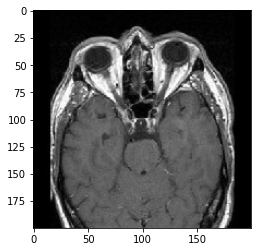

In [90]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [91]:
X_updated = X.reshape(len(X), -1)
X_updated.shape


(1222, 40000)

### Split Data

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [93]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [94]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Train Model

In [95]:
sv = SVC()
sv.fit(xtrain, ytrain)


SVC()

In [96]:
import sklearn.externals
import joblib
# Save the model to a file
joblib.dump(sv, 'svc.pkl')



['svc.pkl']

In [1]:
import joblib
sv = joblib.load("svc.pkl")

In [5]:
# Creating the GUI
from tkinter import *
from PIL import Image, ImageTk
import customtkinter
import tkinter
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfilename
from tkinter import messagebox
import keras.utils as image
import numpy as np
import os
import cv2
customtkinter.set_appearance_mode("System")
root = customtkinter.CTk()

#window size
root.rowconfigure(0,weight=1)    
root.columnconfigure(0,weight=1)

root.geometry('600x600')
root.title('Kidney Stone Detection')

# Function to Select Image
def browse_btn():
    global image_name
    
    label_cnn.configure(text="")
    label.configure(text="")
    
    image_name = askopenfilename(title='Select Image')
    img = Image.open(image_name)
    img = img.resize((400, 400), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    panel = tk.Label(root, image=img)
    panel.image = img
    panel.grid(row=0,column=1,sticky='nw',padx=50,pady=50)


dec = {0:'No Tumor', 1:'Positive Tumor'}
#Function for Predict SVM        
def predict_btn_svm():
    global label_prediction
    global image_name
    test_img = cv2.imread(image_name)
    image = cv2.imread(image_name,0)
    img1 = cv2.resize(image, (200,200))
    img1 = img1.reshape(1,-1)/255
    print(img1.shape)
    p = sv.predict(img1)
    label.configure (text=dec[p[0]])
# Browse Button
browsebtn = customtkinter.CTkButton(master=root, text="Importer les images", command=browse_btn)
browsebtn.grid(row=0, column=0,sticky='nw',padx=20,pady=20)


#Label Result CNN
label_cnn = customtkinter.CTkLabel(root, text="")
label_cnn.grid(row=1,column=1,sticky='nw',padx=20,pady=20)

#Label Result SVM
label = customtkinter.CTkLabel(root, text="")
label.grid(row=2,column=1,sticky='nw',padx=20,pady=20)
# Predict Butoon SVM
predictbtnsvm = customtkinter.CTkButton(master=root, text="Classification avec SVM", command=predict_btn_svm)
predictbtnsvm.grid(row=2, column=0,sticky='nw',padx=20,pady=20)

# Running the GUI
root.mainloop()

c:\Users\ayoub\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.


(1, 40000)


### Evaluation

In [100]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

### Prediction

In [ ]:
pred = sv.predict(xtest)


In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])


Total Misclassified Samples:  9
0 1


### TEST MODEL

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

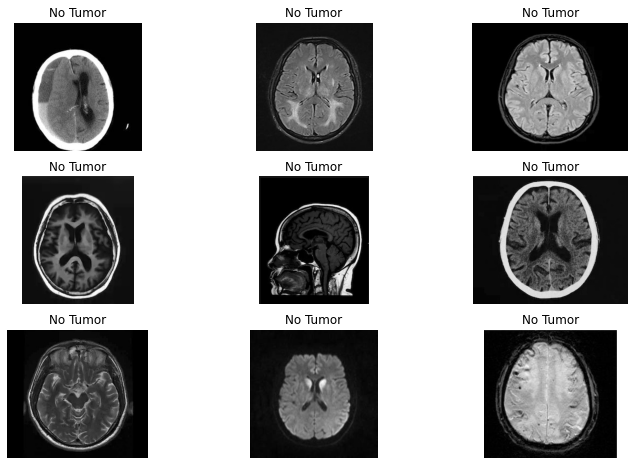

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [1]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

NameError: name 'plt' is not defined